In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data1 = pd.read_csv('./csse_covid19_daily_reports_cleaned.csv')

In [37]:
data1.columns

Index(['year', 'Province', 'country', 'updated_dates', 'latitude', 'longitude',
       'confirmed', 'deaths', 'recovered', 'active', 'incident', 'fatality'],
      dtype='object')

In [38]:
data1.shape

(2947, 12)

In [39]:
data1.head()

,year,Province,country,updated_dates,latitude,longitude,confirmed,deaths,recovered,active,incident,fatality
0,2021,Sindh,Pakistan,2021-01-02,26.009446,68.776807,216632.0,3582.0,196134.0,16916.0,452.390614,1.653495
1,2021,Sindh,Pakistan,2021-01-03,26.009446,68.776807,217636.0,3594.0,196677.0,17365.0,454.487258,1.651381
2,2021,Sindh,Pakistan,2021-01-04,26.009446,68.776807,218597.0,3611.0,197430.0,17556.0,456.494105,1.651898
3,2021,Sindh,Pakistan,2021-01-05,26.009446,68.776807,219452.0,3623.0,197870.0,17959.0,458.279594,1.650930
4,2021,Sindh,Pakistan,2021-01-06,26.009446,68.776807,220501.0,3634.0,198577.0,18290.0,460.470211,1.648065


In [59]:
date_wise = data1.set_index('updated_dates').loc['2021-08-05']
date_wise

,year,Province,country,latitude,longitude,confirmed,deaths,recovered,active,incident,fatality
updated_dates,,,,,,,,,,,
2021-08-05,2021,Sindh,Pakistan,26.009446,68.776807,392433.0,6098.0,339379.0,46956.0,819.514226,1.553896
2021-08-05,2021,Punjab,Pakistan,30.811346,72.139132,360494.0,11122.0,334305.0,15067.0,327.684754,3.085211
2021-08-05,2021,Islamabad,Pakistan,33.665087,73.121219,89117.0,807.0,83918.0,4392.0,4441.256033,0.905551
2021-08-05,2021,Khyber Pakhtunkhwa,Pakistan,34.485332,72.091690,146485.0,4495.0,136868.0,5122.0,479.910951,3.068574
2021-08-05,2021,Balochistan,Pakistan,28.328492,65.898403,30880.0,329.0,29074.0,1477.0,250.153754,1.065415
2021-08-05,2021,Azad Jammu and Kashmir,Pakistan,34.027401,73.947253,25778.0,636.0,21605.0,3537.0,637.222936,2.467220
2021-08-05,2021,Gilgit-Baltistan,Pakistan,35.792146,74.982138,8473.0,148.0,7467.0,858.0,835.944530,1.746725


In [63]:
province_wise = date_wise[['Province', 'confirmed', 'deaths', 'recovered', 'active']]
province_wise

,Province,confirmed,deaths,recovered,active
updated_dates,,,,,
2021-08-05,Sindh,392433.0,6098.0,339379.0,46956.0
2021-08-05,Punjab,360494.0,11122.0,334305.0,15067.0
2021-08-05,Islamabad,89117.0,807.0,83918.0,4392.0
2021-08-05,Khyber Pakhtunkhwa,146485.0,4495.0,136868.0,5122.0
2021-08-05,Balochistan,30880.0,329.0,29074.0,1477.0
2021-08-05,Azad Jammu and Kashmir,25778.0,636.0,21605.0,3537.0
2021-08-05,Gilgit-Baltistan,8473.0,148.0,7467.0,858.0


<Figure size 720x720 with 0 Axes>

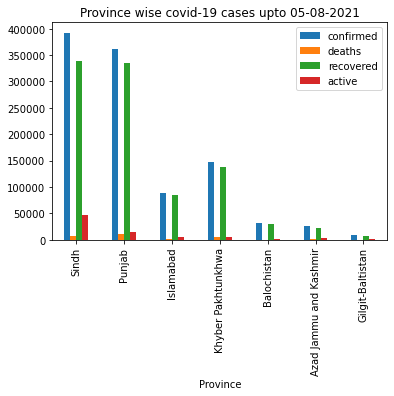

In [69]:
plt.figure(figsize=  (10,10))
province_wise.plot.bar('Province',['confirmed', 'deaths', 'recovered', 'active'])
plt.title('Province wise covid-19 cases upto 05-08-2021')
plt.show()

# Correlation of variables

In [137]:
data1[['Province', 'confirmed', 'deaths', 'recovered', 'active', 'incident',
      'fatality']].corr()

,confirmed,deaths,recovered,active,incident,fatality
confirmed,1.000000,0.931727,0.996797,0.644608,0.027539,0.142076
deaths,0.931727,1.000000,0.927988,0.574520,-0.097987,0.353985
recovered,0.996797,0.927988,1.000000,0.581843,0.033672,0.138394
active,0.644608,0.574520,0.581843,1.000000,-0.010218,0.066407
incident,0.027539,-0.097987,0.033672,-0.010218,1.000000,-0.435136
fatality,0.142076,0.353985,0.138394,0.066407,-0.435136,1.000000


# Confirmed cases and Deaths

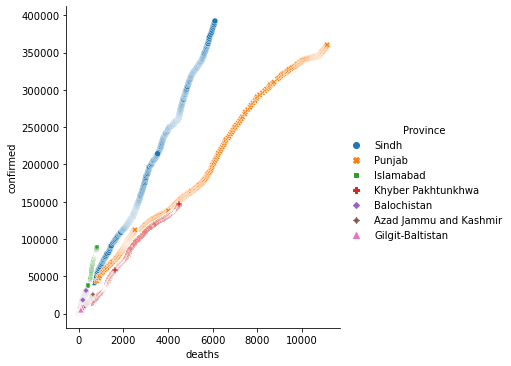

In [157]:

sns.relplot(x = 'deaths', y = 'confirmed', data = data1, kind = 'scatter',
           style = 'Province', hue = 'Province')
plt.show()

# Recovered and Confirmed cases

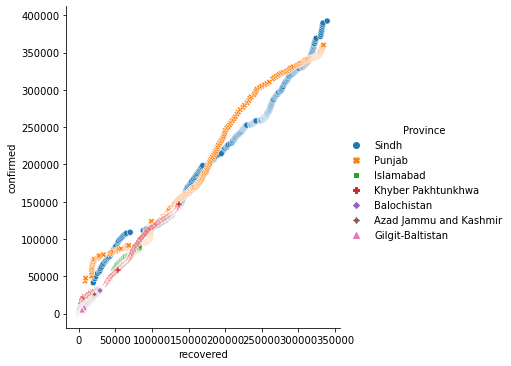

In [156]:

sns.relplot(x = 'recovered', y = 'confirmed', data = data1, kind = 'scatter',
           style = 'Province', hue = 'Province', markers = True)
plt.show()

# Confirmed and Active Cases

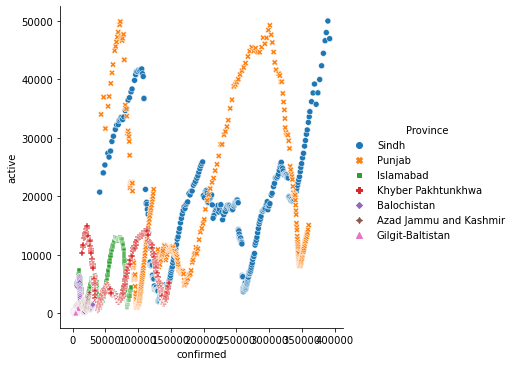

In [155]:

sns.relplot(x = 'confirmed', y = 'active', data= data1, kind = 'scatter',
           style = 'Province', hue = 'Province', markers = True)
plt.show()

# Deaths and Fatality

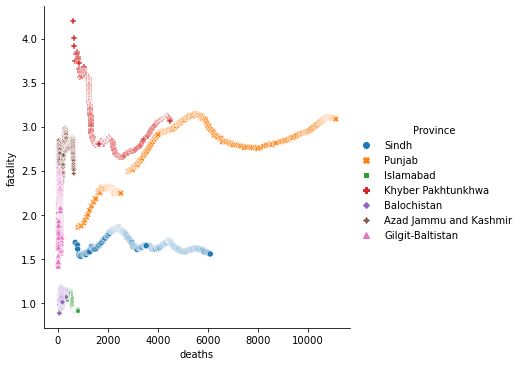

In [154]:

sns.relplot(x = 'deaths', y = 'fatality', data= data1, kind = 'scatter',
           style = 'Province', hue = 'Province', markers = True)
plt.show()

# Recovered and Deaths


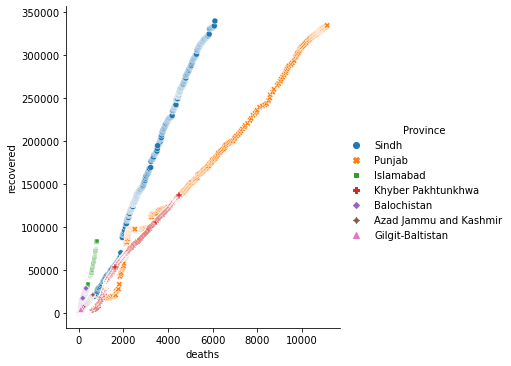

In [153]:

sns.relplot(x = 'deaths', y = 'recovered', data= data1, kind = 'scatter',
           style = 'Province', hue = 'Province', markers = True)
plt.show()

# Recovered and active


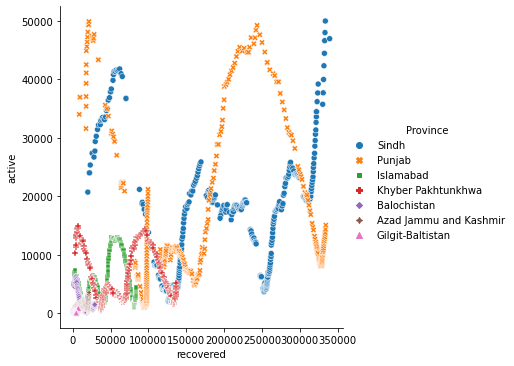

In [152]:

sns.relplot(x = 'recovered', y = 'active', data= data1, kind = 'scatter',
           style = 'Province', hue = 'Province', markers = True)
plt.show()

# Active and deaths

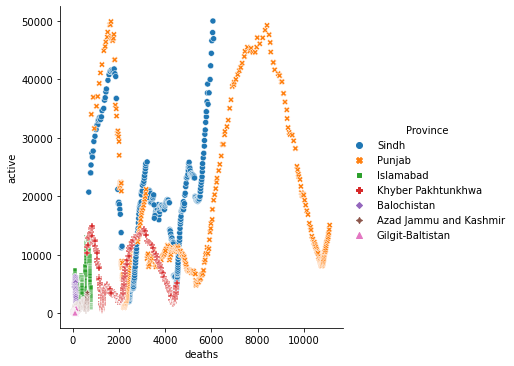

In [151]:

sns.relplot(x = 'deaths', y = 'active', data= data1, kind = 'scatter',
           style = 'Province', hue = 'Province', markers = True)
plt.show()